In [5]:
# !pip install scikit-fuzzy
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [41]:
# Define input variables
velocity = ctrl.Antecedent(np.arange(0, 201, 1), 'velocity')
velocity['stop'] = fuzz.trimf(velocity.universe, [0, 0, 10])
velocity['very_slow'] = fuzz.trimf(velocity.universe, [0, 25, 50])
velocity['slow'] = fuzz.trimf(velocity.universe, [25, 50, 80])
velocity['average'] = fuzz.trimf(velocity.universe, [50, 75, 100])
velocity['fast'] = fuzz.trimf(velocity.universe, [80, 125, 175])
velocity['very_fast'] = fuzz.trapmf(velocity.universe, [125, 175, 200, 250])

distance = ctrl.Antecedent(np.arange(0, 201, 1), 'distance')
distance['very_close'] = fuzz.trapmf(distance.universe, [0, 0, 5, 15])
distance['close'] = fuzz.trimf(distance.universe, [10, 20, 30])
distance['near'] = fuzz.trimf(distance.universe, [25, 50, 75])
distance['far'] = fuzz.trimf(distance.universe, [70, 100, 130])
distance['very_far'] = fuzz.trimf(distance.universe, [120, 160, 200])

# Define output variable
brake = ctrl.Consequent(np.arange(0, 101, 1), 'brake')
brake['very_light'] = fuzz.trimf(brake.universe, [0, 0, 10])
brake['light'] = fuzz.trimf(brake.universe, [0, 15, 30])
brake['medium'] = fuzz.trimf(brake.universe, [20, 40, 60])
brake['heavy'] = fuzz.trimf(brake.universe, [50, 70, 90])
brake['very_heavy'] = fuzz.trimf(brake.universe, [80, 100, 100])

In [42]:
rules = [
    ctrl.Rule(velocity['stop'] & distance['very_close'], brake['very_light']),
    ctrl.Rule(velocity['very_slow'] & distance['very_close'], brake['very_light']),
    ctrl.Rule(velocity['very_slow'] & distance['close'], brake['very_light']),
    ctrl.Rule(velocity['very_slow'] & distance['near'], brake['very_light']),
    ctrl.Rule(velocity['very_slow'] & distance['far'], brake['light']),
    ctrl.Rule(velocity['slow'] & distance['very_close'], brake['medium']),
    ctrl.Rule(velocity['slow'] & distance['close'], brake['light']),
    ctrl.Rule(velocity['slow'] & distance['near'], brake['light']),
    ctrl.Rule(velocity['slow'] & distance['far'], brake['medium']),
    ctrl.Rule(velocity['average'] & distance['very_close'], brake['heavy']),
    ctrl.Rule(velocity['average'] & distance['close'], brake['medium']),
    ctrl.Rule(velocity['average'] & distance['near'], brake['light']),
    ctrl.Rule(velocity['average'] & distance['far'], brake['very_light']),
    ctrl.Rule(velocity['average'] & distance['very_far'], brake['very_light']),
    ctrl.Rule(velocity['fast'] & distance['very_close'], brake['very_heavy']),
    ctrl.Rule(velocity['fast'] & distance['close'], brake['heavy']),
    ctrl.Rule(velocity['fast'] & distance['near'], brake['medium']),
    ctrl.Rule(velocity['fast'] & distance['far'], brake['light']),
    ctrl.Rule(velocity['fast'] & distance['very_far'], brake['light']),
    ctrl.Rule(velocity['very_fast'] & distance['very_close'], brake['very_heavy']),
    ctrl.Rule(velocity['very_fast'] & distance['close'], brake['very_heavy']),
    ctrl.Rule(velocity['very_fast'] & distance['near'], brake['medium']),
    ctrl.Rule(velocity['very_fast'] & distance['far'], brake['light']),
    ctrl.Rule(velocity['very_fast'] & distance['very_far'], brake['light'])
]

In [43]:
brake_ctrl = ctrl.ControlSystem(rules)
brake_simulation = ctrl.ControlSystemSimulation(brake_ctrl)

In [44]:
brake_simulation.input['velocity'] = 130
brake_simulation.input['distance'] = 72
brake_simulation.compute()

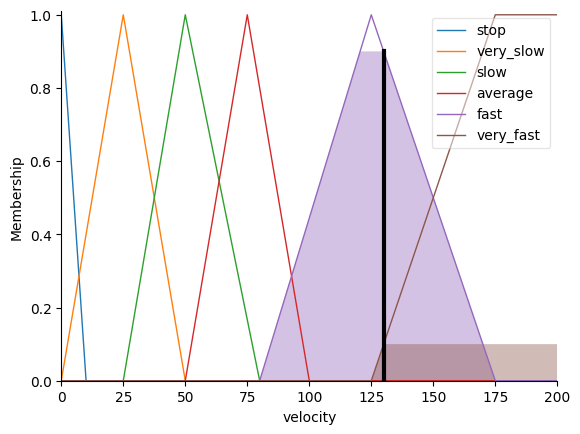

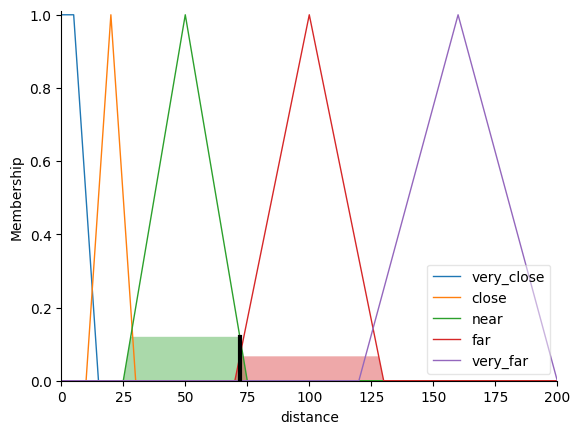

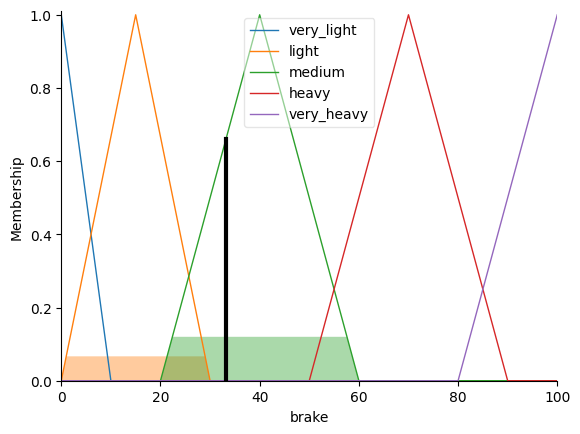

In [45]:
velocity.view(sim=brake_simulation)
distance.view(sim=brake_simulation)
brake.view(sim=brake_simulation)

plt.show()